# Sumário
- [Dados](#Dados)
- [Modelo](#Modelo)
- [Analisando o modelo](#Analisando-o-modelo)
- [Dataset validação](#validacao)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dados

### Preparando dados para análise

- Adicionando os dados

In [3]:
data_base = pd.read_csv('cartao_de_credito.csv', encoding='latin1', delimiter=';')

- Renomeando as colunas

In [4]:
new_column_names = {
    'Identificador da transação': 'tran_id',
    'Bandeira do Cartão': 'flag',
    'Distância de Casa': 'dst_home',
    'Distância da Última Transação': 'dst_last_tran',
    'Razão entre o valor da compra e o valor médio': 'buy over avg_buy',
    'Local Repetido': 'local_rep',
    'Usou Chip': 'use_chip',
    'Usou Senha': 'use_password',
    'Online': 'online',
    'Fraude': 'fraud'
}

data_base.rename(columns=new_column_names, inplace=True)

- analisando os tipos de dados das colunas

In [5]:
df = data_base
df.head(5)

,tran_id,flag,dst_home,dst_last_tran,buy over avg_buy,local_rep,use_chip,use_password,online,fraud
0,1000009D,MASTER,"5,119457278","0,913453546","0,408709129",1,1,0,0,NÃO
1,1000063B,MASTER,"26,64658525","0,06825023","2,535936997",1,0,0,0,NÃO
2,10000985,VISA,"12,4482146","0,186041174","1,808703747",1,1,0,1,NÃO
3,100009D1,AMEX,"231,5171003","0,27807144","0,439694438",1,1,0,0,NÃO
4,100009E9,AMEX,"1,961591373","0,836718644","2,043624299",1,0,0,1,NÃO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999000 entries, 0 to 998999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   tran_id           999000 non-null  object
 1   flag              999000 non-null  object
 2   dst_home          999000 non-null  object
 3   dst_last_tran     999000 non-null  object
 4   buy over avg_buy  999000 non-null  object
 5   local_rep         999000 non-null  int64 
 6   use_chip          999000 non-null  int64 
 7   use_password      999000 non-null  int64 
 8   online            999000 non-null  int64 
 9   fraud             999000 non-null  object
dtypes: int64(4), object(6)
memory usage: 76.2+ MB


- Convertendo valores contínuos para float: ```dst_home```, ```dst_last_tran```, ```buy over avg_buy```

In [7]:
df = df.replace({',': '.'}, regex=True)
df = df.astype({
    'dst_home': float, 
    'dst_last_tran': float, 
    'buy over avg_buy': float
})

### Analisando os dados

#### Variáveis 

In [9]:
df.describe()

,dst_home,dst_last_tran,buy over avg_buy,local_rep,use_chip,use_password,online
count,999000.000000,999000.000000,999000.000000,999000.000000,999000.000000,999000.000000,999000.000000
mean,26.610223,5.031639,1.822193,0.881521,0.350474,0.100650,0.650402
std,65.353221,25.811644,2.792734,0.323175,0.477119,0.300864,0.476843
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000
25%,3.877728,0.296660,0.475539,1.000000,0.000000,0.000000,0.000000
50%,9.966145,0.998619,0.997274,1.000000,0.000000,0.000000,1.000000
75%,25.733955,3.355348,2.094696,1.000000,1.000000,0.000000,1.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000


<Axes: >

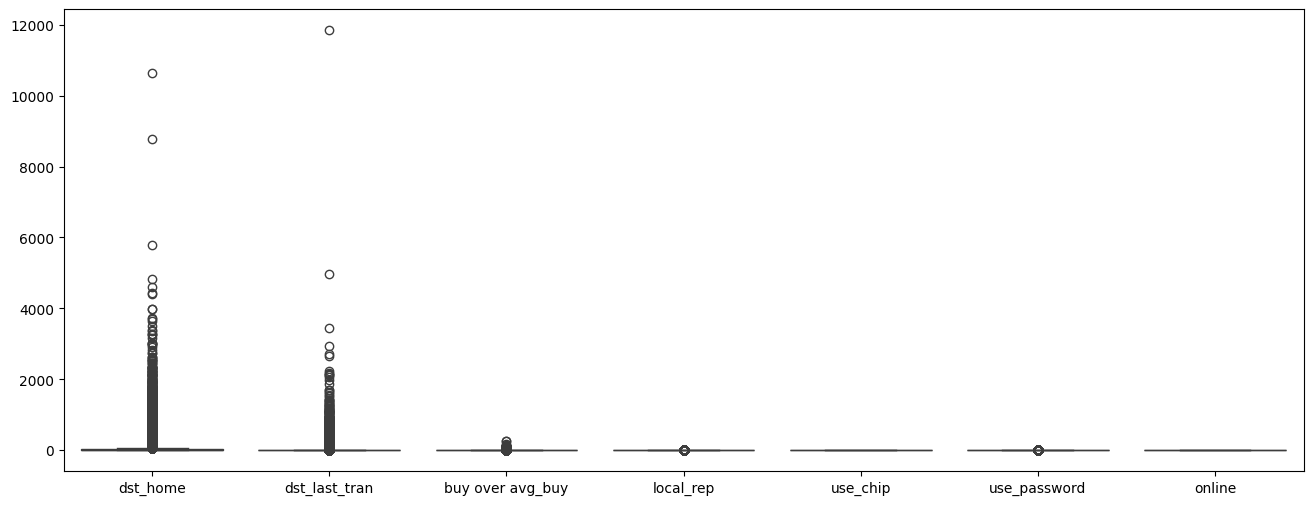

In [10]:
plt.figure(figsize=(16,6))
sns.boxplot(data = df)

#### Relacionamento de todas as colunas com fraud

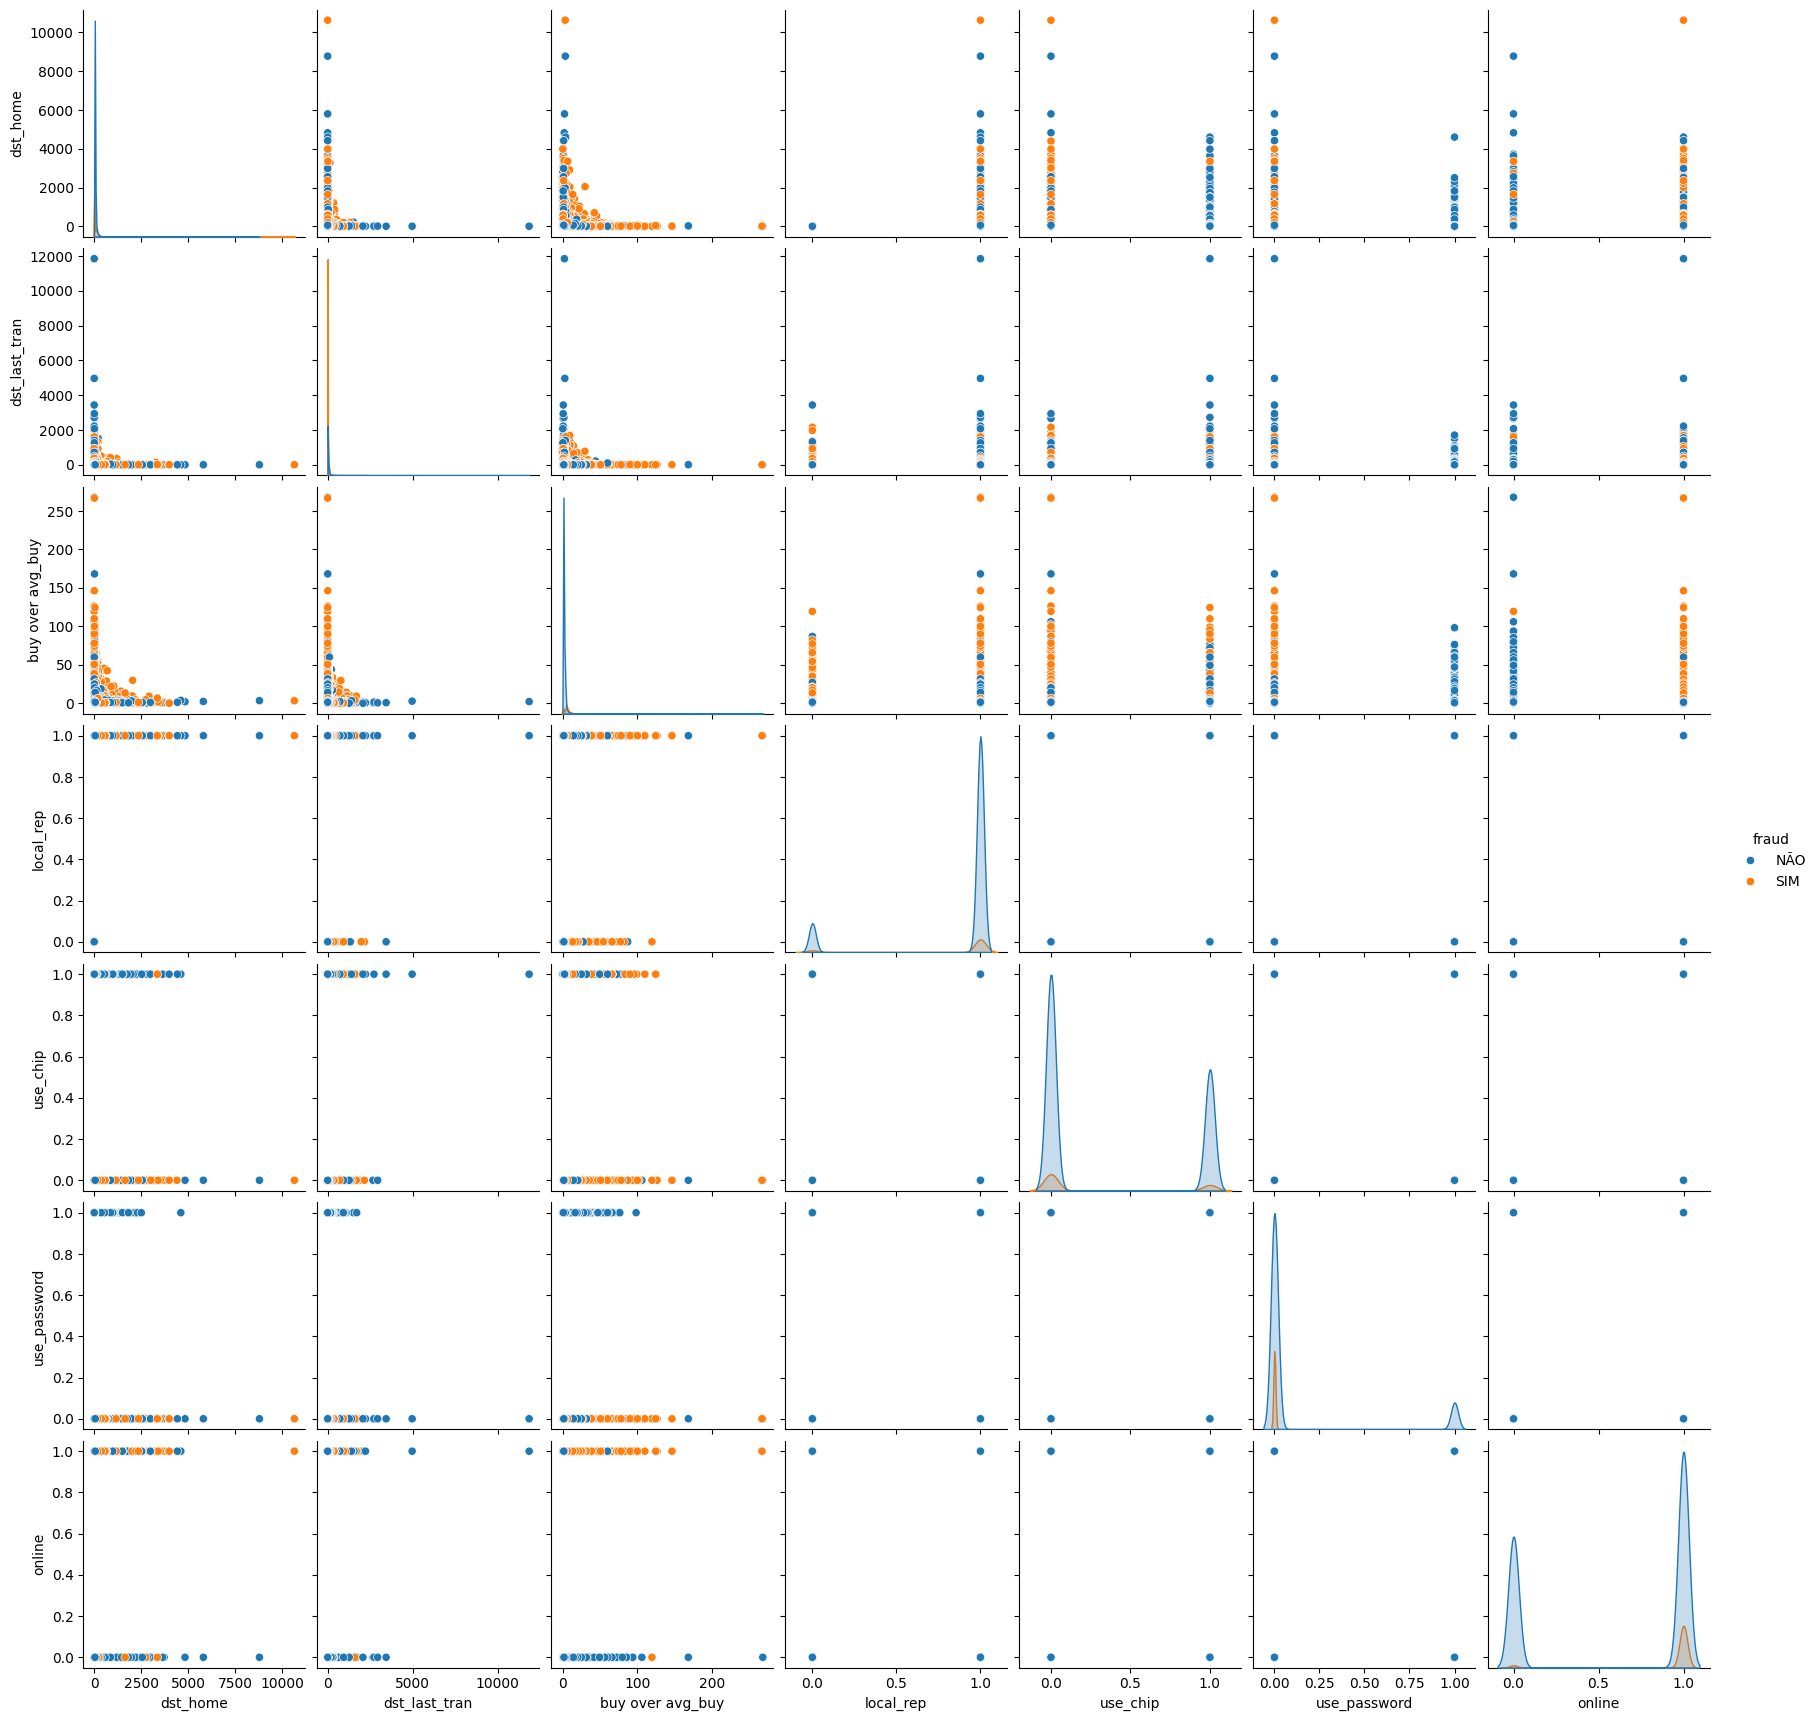

In [11]:
sns.pairplot(df, hue="fraud")

#### Relação de fraude com as variáveis contínuas

distância de casa

<Axes: xlabel='distância de casa', ylabel='fraude'>

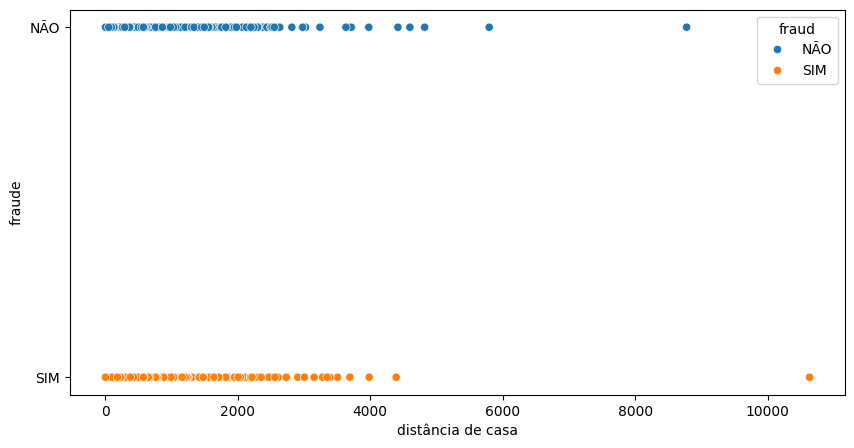

In [10]:
plt.figure( figsize=(10, 5))
plt.xlabel('distância de casa')
plt.ylabel('fraude')
sns.scatterplot( data=df, x='dst_home', y='fraud', hue='fraud')

- distância da última transação

<Axes: xlabel='distância da última transação', ylabel='fraude'>

/home/edson/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/edson/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


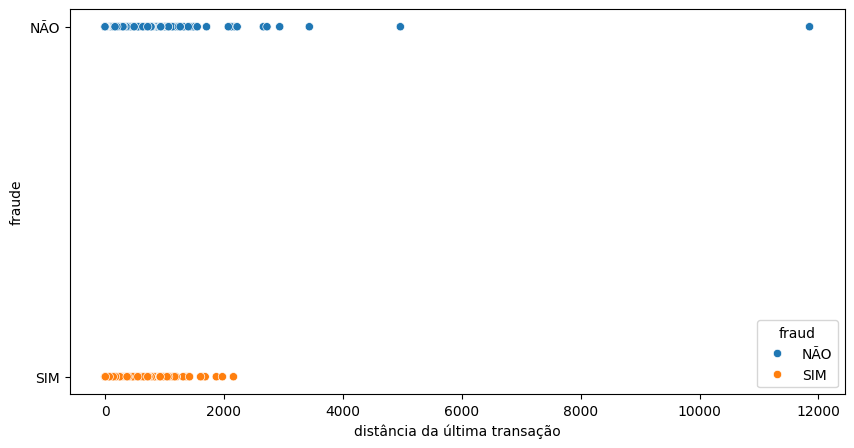

In [11]:
plt.figure( figsize=(10, 5))
plt.xlabel('distância da última transação')
plt.ylabel('fraude')
sns.scatterplot( data=df, x='dst_last_tran', y='fraud', hue='fraud')

- Razão da compra e o valor médio

<Axes: xlabel='Razão entre o valor da compra e o valor médio', ylabel='fraude'>

/home/edson/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/edson/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


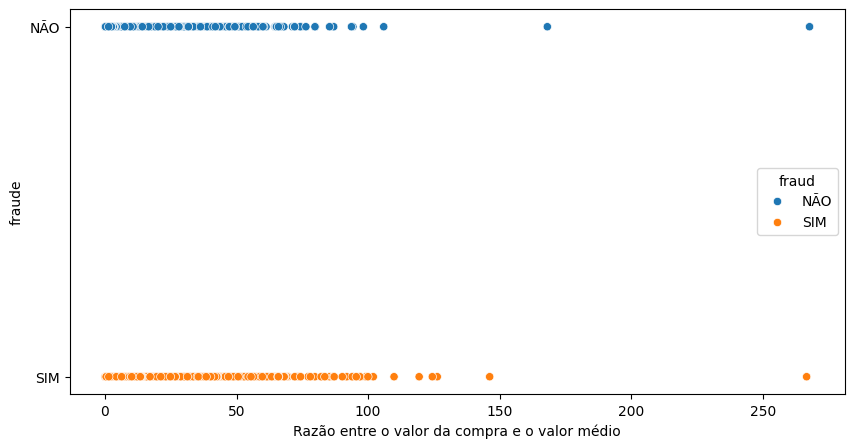

In [12]:
plt.figure( figsize=(10, 5))
plt.xlabel('Razão entre o valor da compra e o valor médio')
plt.ylabel('fraude')
sns.scatterplot( data=df, x='buy over avg_buy', y='fraud', hue='fraud')

#### Variável alvo fraude

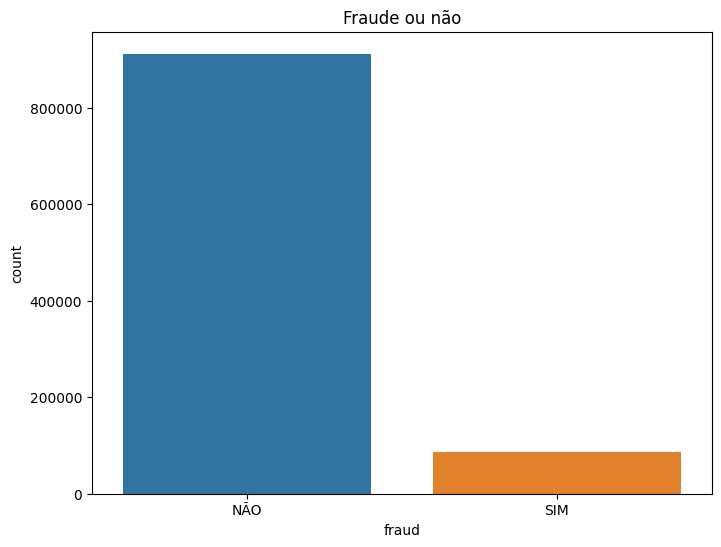

In [13]:
plt.figure(figsize=(8, 6))
plt.title("Fraude ou não")
sns.countplot(df, x='fraud', hue='fraud')
plt.show()

In [14]:
df.groupby('fraud').size()

fraud
NÃO    912097
SIM     86903
dtype: int64

#### Conclusão da análise

- Para evitar evitar overfitting a coluna fraud deve ser balanceada.
- As colunas com valores contínuos devem ser padronizadas para evitar vieses.
- As coluna flag com valores categóricos deve ser convertida para análise

## Modelo

### Pré-processamento

#### Conversão da bandeira do cartão com ```hot enconding```

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

labels_flag = label_encoder.fit_transform(df.flag)
df['flag_label']  = labels_flag
features_arr = one_hot_encoder.fit_transform(df[['flag_label']]).toarray()

> Default parâmetros do <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html" target="_blank">OneHotEncoder</a>
- ```categories```: ```auto```
- ```drop```: ```none```
- ```sparse_output```: ```True```
- ```dtype```: ```np.float64```
- ```handle_unknown```: ```error```
- ```min_frequency```: ```None```
- ```max_categories```: ```None```
- ```feature_name_combiner```: ```concat```

In [16]:
features_labels = list(label_encoder.classes_)
features = pd.DataFrame(features_arr, columns=features_labels)
fraud = df['fraud']
df = df.drop('fraud', axis=1)
df = pd.concat([df, features], axis=1)
df = pd.concat([df, fraud], axis=1)
df.head(5)

,tran_id,flag,dst_home,dst_last_tran,buy over avg_buy,local_rep,use_chip,use_password,online,flag_label,AMEX,DINNERS,ELO,MASTER,VISA,fraud
0,1000009D,MASTER,5.119457,0.913454,0.408709,1,1,0,0,3,0.0,0.0,0.0,1.0,0.0,NÃO
1,1000063B,MASTER,26.646585,0.068250,2.535937,1,0,0,0,3,0.0,0.0,0.0,1.0,0.0,NÃO
2,10000985,VISA,12.448215,0.186041,1.808704,1,1,0,1,4,0.0,0.0,0.0,0.0,1.0,NÃO
3,100009D1,AMEX,231.517100,0.278071,0.439694,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,NÃO
4,100009E9,AMEX,1.961591,0.836719,2.043624,1,0,0,1,0,1.0,0.0,0.0,0.0,0.0,NÃO


#### Padronização dos dados

In [17]:
df.columns

Index(['tran_id', 'flag', 'dst_home', 'dst_last_tran', 'buy over avg_buy',
       'local_rep', 'use_chip', 'use_password', 'online', 'flag_label', 'AMEX',
       'DINNERS', 'ELO', 'MASTER', 'VISA', 'fraud'],
      dtype='object')

> Default parâmetros do <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html" target="_blank">StandardScaler</a>
- ```copy```: ```True```
- ```with_mean```: ```True```
- ```with_std```: ```True```

<Axes: >

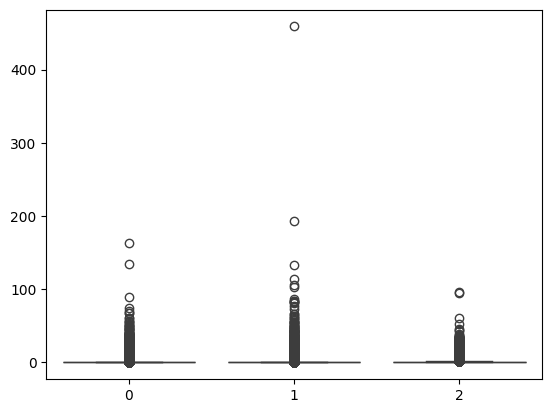

In [18]:
from sklearn.preprocessing import StandardScaler

obj_std = StandardScaler().fit(df[['dst_home', 'dst_last_tran', 'buy over avg_buy']])
df_std = obj_std.transform(df[['dst_home', 'dst_last_tran', 'buy over avg_buy']])

sns.boxplot(data = df_std)

#### Particionamento dos dados

In [19]:
from sklearn.model_selection import train_test_split
features = np.concatenate((df_std, df.iloc[:, 5:15].drop('flag_label', axis=1).values), axis=1) 
forecast = df.iloc[:,15:16].values

X_training, X_test, y_training, y_test = train_test_split( features, 
                                                           forecast, 
                                                           test_size=0.20)

#### Undersampling dos dados de treino

- Realizando undersampling utilizando a técnica ```Edited Nearest Neighbours```

In [20]:
from imblearn.under_sampling import EditedNearestNeighbours

> Default parâmetros do <a href="https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.EditedNearestNeighbours.html" target="_blank">EditedNearestNeighbours no imbleatn</a>
- ```kind_sel```: ```all```
- ```n_jobs```: ```None```


In [21]:
enn = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=10)

X_res, y_res = enn.fit_resample(X_training, y_training)

### Criando modelo

#### K-means

In [22]:
from sklearn.cluster import KMeans

> Default parâmetros do <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans" target="_blank">KMeans no sklearn</a>
- ```init```: ```k-means++```
- ```max_iter```:```300```
- ```tol```: ```1e-4```
- ```verbose```: ```0```
- ```random_state```: ```None```
- ```copy_x```: ```True```
- ```algorithm```: ```lloyd```


In [23]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X_res)

KMeans(n_clusters=2, n_init=10)

### Analisando o modelo

#### Rotulando os valores

Uma vez que a maior parte dos dados são de não fraude, o cluster com menor quantidade será considerado como fraude.

In [24]:
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print(cluster_counts)

higher = 0
if (cluster_counts[1] > cluster_counts[0]):
    higher = 1

{0: 50530, 1: 742305}


Convertendo os valores inteiros para sim e não

In [25]:
forecasts = kmeans.predict(X_test)
transformed_forecasts = np.where(forecasts == higher, "NÃO", "SIM").reshape(-1, 1)

#### Realizando análises

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
cm = confusion_matrix
cr = classification_report
roc = roc_auc_score

- Matrix de confusão

In [27]:
print(cm(y_test, transformed_forecasts))

[[177756   4799]
 [  9216   8029]]


- relatório de classificação

In [28]:
print(cr( y_test, transformed_forecasts))

              precision    recall  f1-score   support

         NÃO       0.95      0.97      0.96    182555
         SIM       0.63      0.47      0.53     17245

    accuracy                           0.93    199800
   macro avg       0.79      0.72      0.75    199800
weighted avg       0.92      0.93      0.93    199800



- área sob curva roc

In [29]:
y_test_numeric = label_encoder.fit_transform(y_test).reshape(y_test.shape)
forecasts_numeric = label_encoder.fit_transform(transformed_forecasts).reshape(transformed_forecasts.shape)
roc = roc_auc_score(y_test_numeric, forecasts_numeric)
print(roc)


0.7196481296513116


/home/edson/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/edson/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Dataset de validação <a id="validacao"></a>

- Obtendo os dados para validação

In [30]:
df_validation = pd.read_csv('dataset_validacao.csv', encoding='latin1', delimiter=';').drop('Fraude', axis=1)
df_execute = df_validation.copy()

#### Preparando os dados para o modelo

In [31]:
df_execute.rename(columns=new_column_names, inplace=True)

In [32]:
df_execute = df_execute.replace({',': '.'}, regex=True)
df_execute = df_execute.astype({
    'dst_home': float, 
    'dst_last_tran': float, 
    'buy over avg_buy': float
})

In [33]:
labels_flag = label_encoder.fit_transform(df_execute.flag)
df_execute['flag_label']  = labels_flag
features_arr = one_hot_encoder.fit_transform(df_execute[['flag_label']]).toarray()

In [34]:
features_labels = list(label_encoder.classes_)
features = pd.DataFrame(features_arr, columns=features_labels)
df_execute = pd.concat([df_execute, features], axis=1)

In [35]:
obj_std = StandardScaler().fit(df_execute[['dst_home', 'dst_last_tran', 'buy over avg_buy']])
df_std = obj_std.transform(df_execute[['dst_home', 'dst_last_tran', 'buy over avg_buy']])


In [36]:
features = np.concatenate((df_std, df_execute.iloc[:, 5:15].drop('flag_label', axis=1).values), axis=1)

In [37]:
forecasts = kmeans.predict(features)
transformed_forecasts = np.where(forecasts == higher, "NÃO", "SIM").reshape(-1, 1)

#### Salvando a previsão do modelo

In [39]:
df_validation['Fraude'] = transformed_forecasts
df_validation.to_csv('dataset_validacao_analisado.csv', index=False)